# Assignment Title: Imagedata Augmentation and Image Classification

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


## I. Basic Image-Handling Processes with OpenCV

1. Reading and writing an image
2. Image transformations

Image transformations are important to augment the training dataset when the dataset size is small (i.e., the number of images is too few). In the following we shall see a few OpenCV functions to manage image data.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving moon-pexels-frank-cone.jpg to moon-pexels-frank-cone (1).jpg


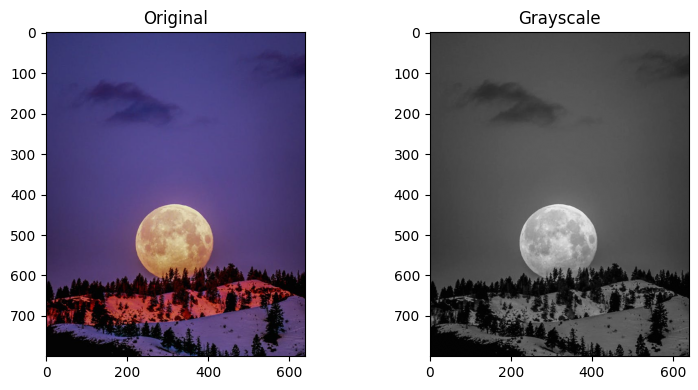

In [3]:
# Method 1: Reading a color image an converting to grayscale image

import matplotlib.pyplot as plt
from PIL import Image

original = Image.open('moon-pexels-frank-cone.jpg')
grayscale = original.convert('L')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

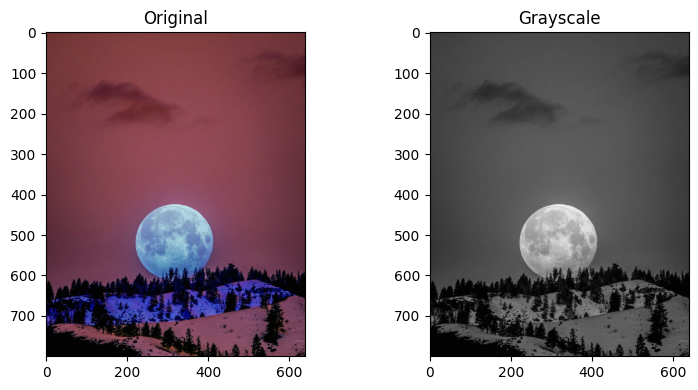

In [4]:
# Method 2: Reading a color image an converting to grayscale image

import cv2
original = cv2.imread('moon-pexels-frank-cone.jpg')

# Use the cvtColor() function to grayscale the image
grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Question 1

Why do you think the color images displayed above look different (that is, Method 1 vs Method 2)?

Method 1 and Method 2 use different libraries for grayscale conversion.

In PIL (Image.convert('L')), grayscale is calculated using its own formula, usually a weighted average of RGB values.

In OpenCV (cv2.imread with flag 0 or cv2.cvtColor), the weights used for R, G, B are slightly different.
Because the formulas are different, the grayscale intensity values differ, so the output images look a little different.

In [6]:
# Saving grayscale images
gray_moon_image = Image.open('moon-pexels-frank-cone.jpg').convert('L')
gray_moon_image.save('graymoon.jpg')

## II. Various Image Transformation

1. Grayscale conversion
2. Shifting
3. Scaling


In [8]:
import numpy as np

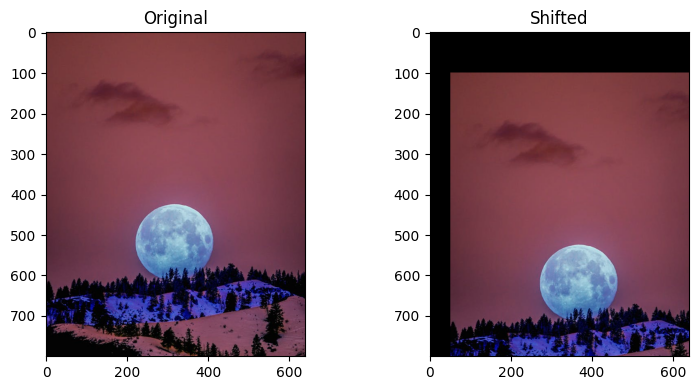

In [9]:
M = np.float32([[1, 0, 50], [0, 1, 100]])
original = cv2.imread('moon-pexels-frank-cone.jpg')
shifted = cv2.warpAffine(original, M, (original.shape[1], original.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(shifted, cmap='gray')
ax[1].set_title("Shifted")

fig.tight_layout()
plt.show()


## Question 2

Implement the following types of image transformation with OpenCV functions:

1. Image resize
2. Image rotation


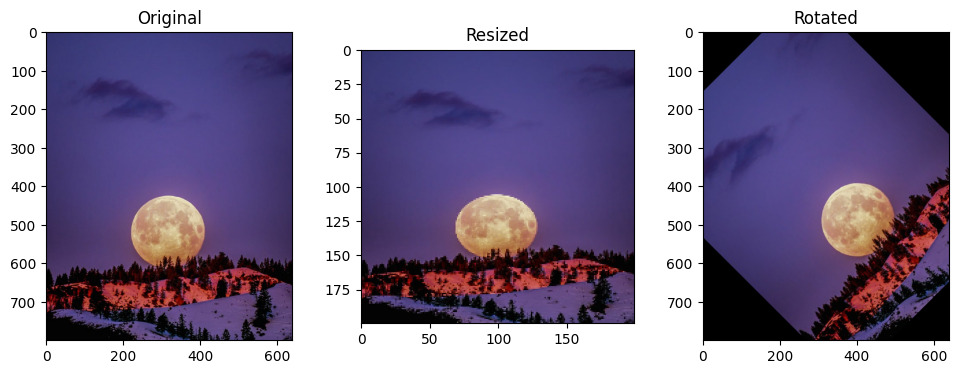

In [16]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('moon-pexels-frank-cone.jpg')


resized_img = cv2.resize(img, (200, 200))


(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(img, M, (w, h))


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title("Resized")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated")

plt.show()


## III. Image Data Loader

In this part, we'll focus on laoding datasets and work with full-sized images, similar to those captured by smartphone cameras.

We'll utilize the Kaggle dataset of cat and dog photos (check teh associated zip file) to demonstrate how to load and utilize images for training neural networks.

The easiest way to load image data is with `datasets.ImageFolder` from `torchvision`. In general you'll use ImageFolder like so:

`dataset = datasets.ImageFolder('path/to/data', transform=transform)`

where 'path/to/data' is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision.

ImageFolder expects the files and directories to be constructed like so:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has its own directory (cat and dog) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label cat. You can download the dataset already structured like this from here. I've also split it into a training set and test set.



In [12]:
# Downlaod the cat and dog dataset
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2025-09-18 17:57:52--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.230.16, 52.216.208.56, 52.216.33.16, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.230.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  50.7MB/s    in 12s     

2025-09-18 17:58:04 (47.4 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [13]:
# unzip the dataset
!unzip Cat_Dog_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cat_Dog_data/train/dog/dog.8636.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8636.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7505.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7505.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1174.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1174.jpg  
  inflating: Cat_Dog_data/train/dog/dog.9528.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.9528.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1612.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1612.jpg  
  inflating: Cat_Dog_data/train/dog/dog.8150.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8150.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7263.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7263.jpg  
  inflating: Cat_Dog_data/train/dog/dog.11043.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.11043.jpg  
  inflating: Cat_Dog_data/train/dog/dog.634

With the `ImageFolder`` loaded, you have to pass it to a DataLoader`. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

To get data out of `dataloader`, you need to loop through it or convert it to an iterator and call next().

```
## Looping through it, get a batch on each loop
for images, labels in dataloader:
    pass

## Get one batch
images, labels = next(iter(dataloader))
```

## IV. Image Transforms

We shall focus on image transforms to augment our dataset.
When you load in the data with ImageFolder, you'll need to define some transforms.

For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`.

Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
```

There are plenty of transforms available, study them in details.


In [14]:
## Hint to question 3
import torch
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

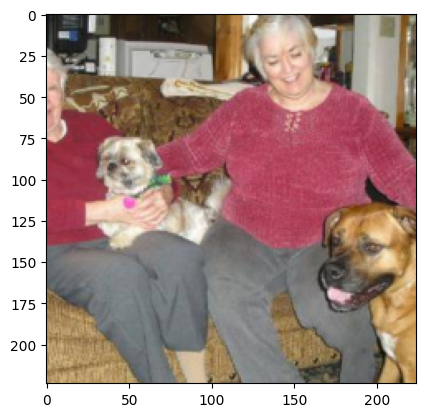

In [15]:
# Display the images
# Run this to test your data loader
images, labels = next(iter(dataloader))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


## Question 3

Load images from the Cat_Dog_data/train folder, define a few additional transforms, then build the dataloader.

In [17]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


train_data = datasets.ImageFolder(root='Cat_Dog_data/train', transform=transform)


train_loader = DataLoader(train_data, batch_size=32, shuffle=True)


print(f"Total training images: {len(train_data)}")

images, labels = next(iter(train_loader))
print(f"Batch size: {images.shape}, Labels: {labels}")


Total training images: 22500
Batch size: torch.Size([32, 3, 128, 128]), Labels: tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 0])


## V. MNIST Classification with CNN (PyTorch)

We have seen how to load image data. Once the image data is loaded with class labels, we can do image classification.

1. Instantiate classifier
2. Download & load MNIST

However, to make things simple, we shall run on a simpler and smaller dataset of handwritten digits, '0' to '9'. This dataset is famously called MNIST handwritten image dataset.


In [18]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 459kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.18MB/s]


## Question 4

Display a few images below to show how the MNIST dataset look like.

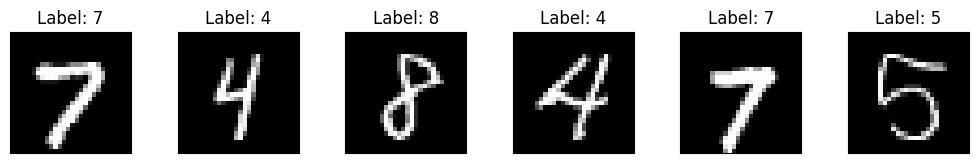

In [19]:
import matplotlib.pyplot as plt


examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)


fig = plt.figure(figsize=(10,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Label: {example_targets[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()


The next two steps are:

3. Build model
4. Train model

In [20]:
# Model: Define your network architecture here

from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [21]:
# Model instance creation and solver instance creation
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


In [22]:
# Train the network here

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.3428939437783603
Training loss: 0.17051638239649122
Training loss: 0.1376525212425802
Training loss: 0.12252797724590746
Training loss: 0.10746882525113806


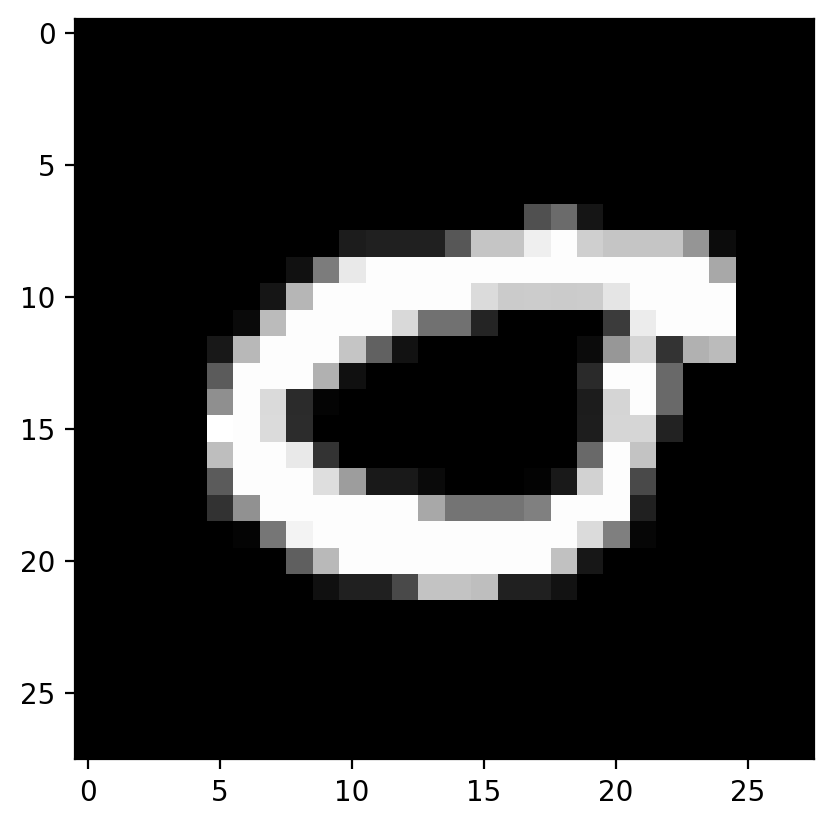

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

images, labels = next(iter(trainloader))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


In [24]:
# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(images[0]))
print(ps)

tensor([[9.8472e-01, 7.8421e-12, 6.9460e-07, 1.1601e-07, 2.2935e-07, 2.2865e-04,
         3.0640e-07, 1.5051e-02, 3.3771e-09, 1.1094e-06]],
       grad_fn=<ExpBackward0>)


In [25]:
# print the index that has the maximum value in ps
print(f"The predicted class is: {torch.argmax(ps)}")

The predicted class is: 0


## VI. MNIST Classification with CNN (Tensorflow-Keras)

We shall now train the MNIST classifier using the Tensorflow-Keras module

## Question 5

Write the entire MNIST image classification code using an object oriented approach using the Tensorflow Keras library
as below.

Importthe approproite modules.


```
class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.____()
        x_train = (x_train.astype("float32") / 255.0)[..., ____]
        x_test  = (x_test.astype("float32") / 255.0)[..., ____]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = ____.Sequential([
            ____.Conv2D(____, (3,3), activation="relu", input_shape=(28,28,1)),
            ____.MaxPooling2D((2,2)),
            ____.Conv2D(____, (3,3), activation="relu"),
            ____.MaxPooling2D((2,2)),
            ____.Flatten(),
            ____.Dense(____, activation="relu"),
            ____.Dense(____, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="____",
                           metrics=[____])

    def train(self, x_train, y_train, epochs=____, batch_size=____):
        self.model.____(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.____(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            ____.imwrite(filename, digit)

            img = ____.imread(filename, ____)
            img = ____.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.____(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    ____.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    ____.waitKey(500)
                    ____.destroyAllWindows()
                except ____.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result

```

And lastly the main code to execute all parts is written below.

```

EPOCHS = #set epoch number
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", ____)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.____)
run_step(3, "Build model", clf.____)
run_step(4, "Train", clf.____, x_train, y_train, EPOCHS, BATCH_SIZE)
run_step(5, "Evaluate", clf.____, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.____, x_test, y_test, 3)

```

Answer for Q5 (Explanation):
In this step, I am building a CNN for MNIST using the TensorFlow–Keras library.
I created a class MNISTClassifier where I included methods for:

Loading and preprocessing the dataset

Building the CNN model

Training the model

Evaluating test accuracy

Using OpenCV to save and reload some digit images for prediction

This makes the code more organized and reusable.

In [26]:
import os
import numpy as np
import tensorflow as tf
import cv2

class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]  # add channel dim
        x_test  = (x_test.astype("float32") / 255.0)[..., np.newaxis]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(10, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def train(self, x_train, y_train, epochs=5, batch_size=64):
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            cv2.imwrite(filename, digit)

            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.predict(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    cv2.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    cv2.waitKey(500)
                    cv2.destroyAllWindows()
                except cv2.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result


Here, I am running the workflow step by step:

Instantiate the classifier

Load the MNIST dataset

Build the CNN model

Train the model for 5 epochs

Evaluate accuracy on test data

Predict a few digit samples using OpenCV

At the end, I get the test accuracy and also check predictions on some images.

In [27]:
EPOCHS = 5   # you can increase if you want
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", MNISTClassifier)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.load_data)
run_step(3, "Build model", clf.build_model)
run_step(4, "Train", clf.train, x_train, y_train, EPOCHS, BATCH_SIZE)
run_step(5, "Evaluate", clf.evaluate, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.predict_with_opencv, x_test, y_test, 3)



[Step 1] Instantiate classifier
[Step 1] Completed.

[Step 2] Load MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[Step 2] Completed.

[Step 3] Build model
[Step 3] Completed.

[Step 4] Train


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 - 42s - 45ms/step - accuracy: 0.9537 - loss: 0.1564
Epoch 2/5
938/938 - 40s - 43ms/step - accuracy: 0.9852 - loss: 0.0470
Epoch 3/5
938/938 - 41s - 44ms/step - accuracy: 0.9901 - loss: 0.0321
Epoch 4/5
938/938 - 41s - 44ms/step - accuracy: 0.9925 - loss: 0.0239
Epoch 5/5
938/938 - 81s - 86ms/step - accuracy: 0.9943 - loss: 0.0177
[Step 4] Completed.

[Step 5] Evaluate
Test Accuracy: 0.9884
[Step 5] Completed.

[Step 6] Predict with OpenCV
Sample 0: True=7 | Pred=7
Sample 1: True=2 | Pred=2
Sample 2: True=1 | Pred=1
[Step 6] Completed.
